In [1]:
%matplotlib inline
from preamble import *
import pandas as pd#pandas用于数据处理
import matplotlib.pyplot as plt#matplotlib.pyplot用于画图
from sklearn.linear_model import LinearRegression#LinearRegression是线性回归
from sklearn.model_selection import train_test_split#train_test_split用于划分数据集
from sklearn.metrics import mean_squared_error#mean_squared_error用于求均方误差

C:\Users\17689\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv("Advertising.csv")
data = pd.DataFrame(data)
print(data.head())
#导入CSV表格中的advertising数据,head查看前五行数据。

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
#特征和标签
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
print('x\n',x.head())
print('\ny\n',y.head())
#数据集中,TV, radio和newspaper三种广告媒体是特征列,Sales销售额是标签列。

x
       TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

y
 0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [4]:
#训练集和测试集
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=1)
print(len(train_x),"train +",len(test_x),"test")

150 train + 50 test


数据集中共有200行数据,按照75%和25%的比例划分训练集和测试集。 其中,训练集用于训练得到模型,测试集用于评价模型的好坏。
给定random_state参数值是为了确保每次运行程序时,划分结果不变。

# 散点图

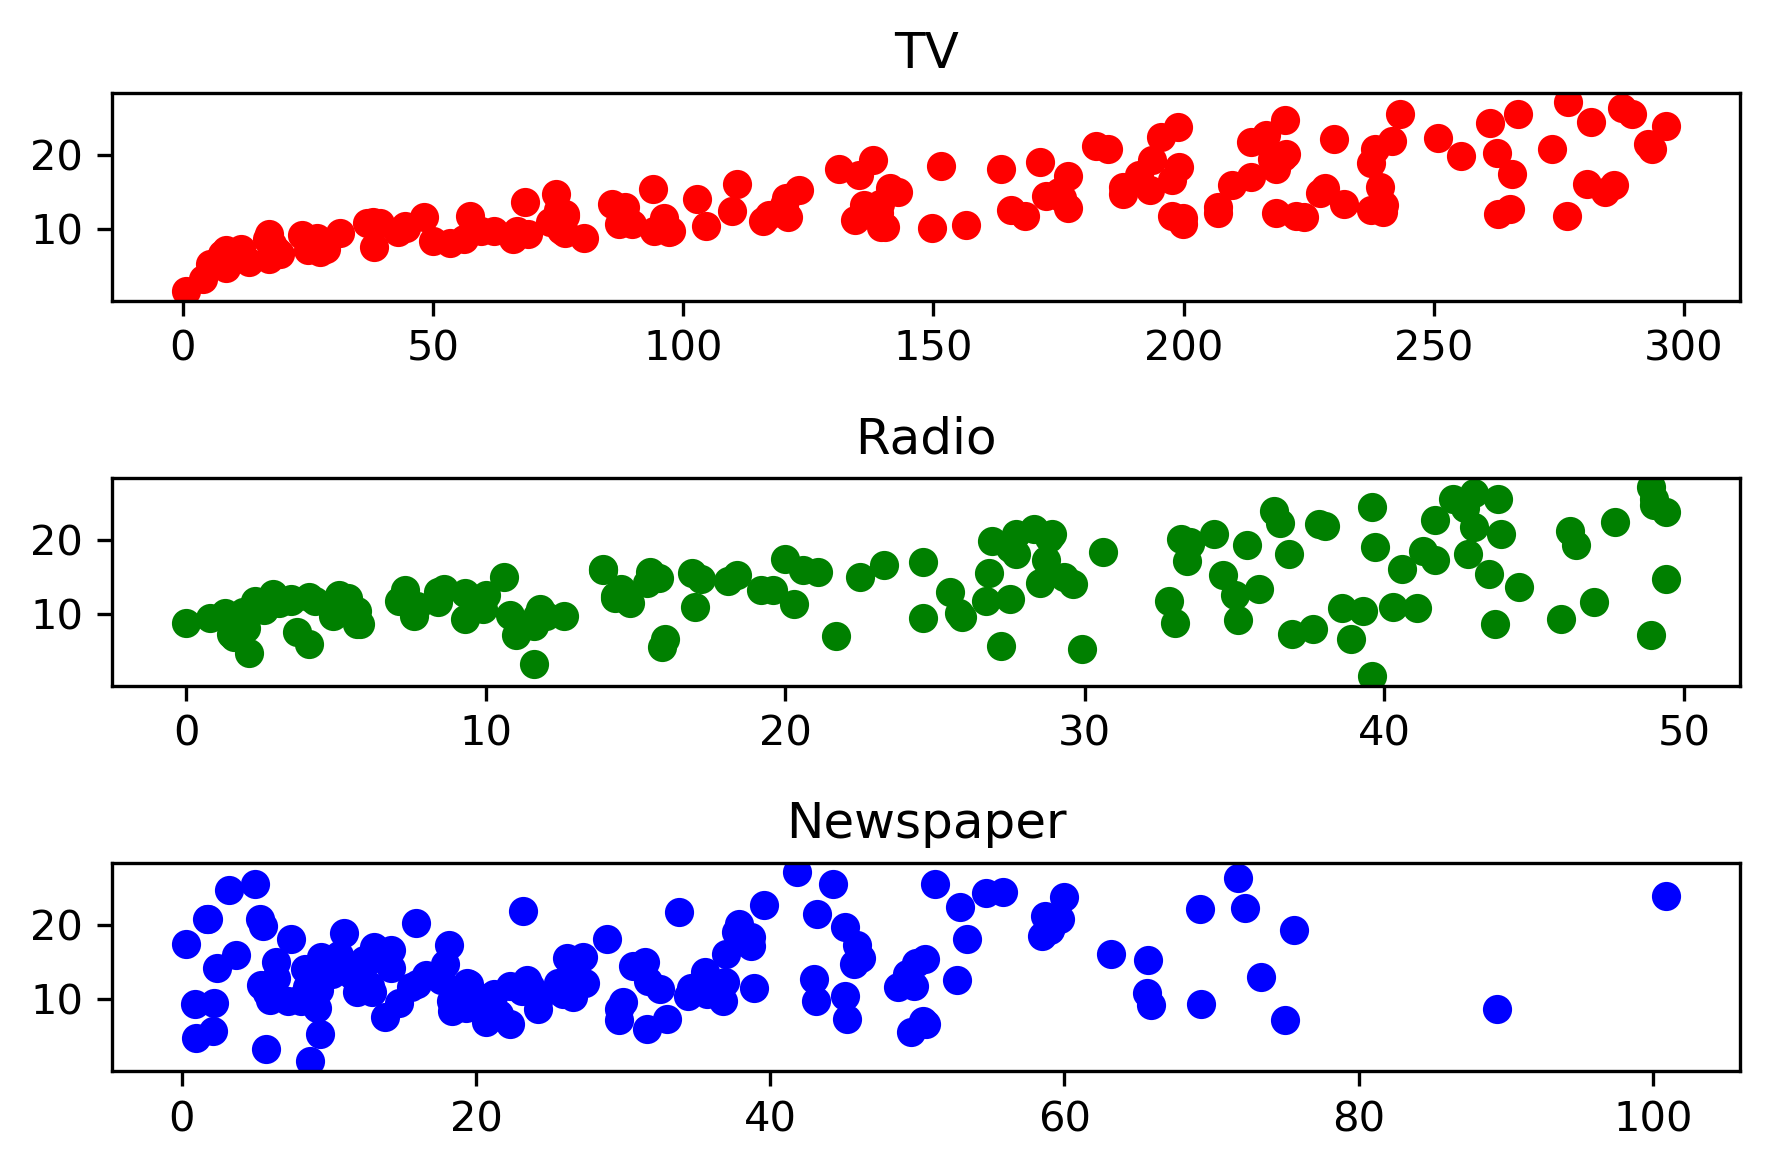

In [5]:
plt.subplot(311)
plt.plot(train_x['TV'],train_y,'ro')
plt.title('TV')
plt.subplot(312)
plt.plot(train_x['Radio'],train_y,'go')
plt.title('Radio')
plt.subplot(313)
plt.plot(train_x['Newspaper'],train_y,'bo')
plt.title('Newspaper')
plt.tight_layout()
plt.show()

根据各特征和标签所做的散点图，可以直观地发现，TV变量和销售额呈现比较明显的正相关，Radio变量和销售额也呈现一定的正相关，而Newspaper变量则和销售额相关性较小。

In [6]:
#相关系数
print(train_x.corrwith(train_y))

TV           0.79
Radio        0.55
Newspaper    0.28
dtype: float64


通过求相关系数，可以定量验证从散点图中得到的结论，TV和销售额的相关系数最大。

In [7]:
lin_reg=LinearRegression()
lin_reg.fit(train_x,train_y)
print(lin_reg.coef_,lin_reg.intercept_)
#使用训练集数据训练线性回归模型，可以得到模型为：
#Sales = 0.0442*TV + 0.199*Radio + 0.00116*Newspaper + 2.893

[0.047 0.179 0.003] 2.8769666223179318


In [8]:
test_y_hat=lin_reg.predict(test_x)
test_mse=mean_squared_error(test_y,test_y_hat)
print("test_mse:",test_mse)
#使用测试集数据计算均方误差，用来评价模型的好坏，得到均方误差

test_mse: 1.9730456202283384


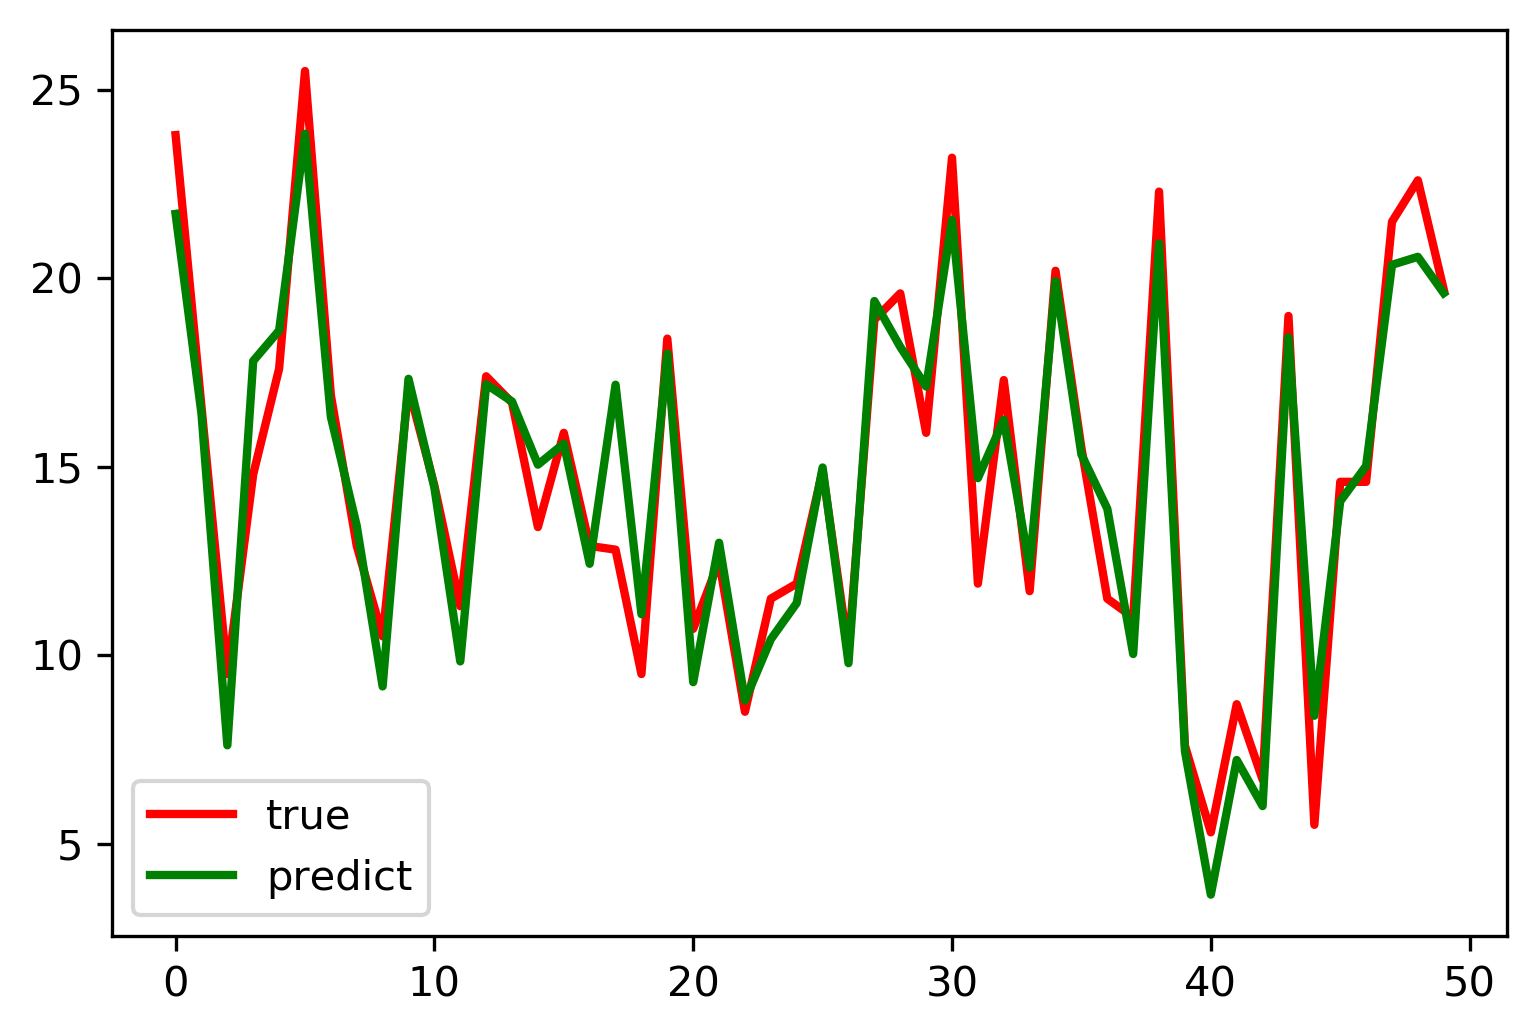

In [9]:
t=range(len(test_x))
plt.plot(t,test_y,'r-',label='true')
plt.plot(t,test_y_hat,'g-',label='predict')
plt.legend()
plt.show()
#使用测试集数据计算均方误差，用来评价模型的好坏，得到均方误差